In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import ExtraTreeClassifier


In [97]:
path = './dogcsv2.csv'
df = pd.read_csv(path)
df.head()

,Nationality,Size,Question1,Question2,Question3,Question4,Question5,Label
0,ต่างชาติ,ใหญ่,จริง,ไม่จริง,จริง,จริง,จริง,โกลเด้น รีทรีฟเวอร์
1,ต่างชาติ,ใหญ่,ไม่จริง,ไม่จริง,ไม่จริง,จริง,ไม่จริง,โกลเด้น รีทรีฟเวอร์
2,ต่างชาติ,ใหญ่,จริง,จริง,จริง,จริง,จริง,โกลเด้น รีทรีฟเวอร์
3,ต่างชาติ,ใหญ่,จริง,ไม่จริง,จริง,จริง,ไม่จริง,โกลเด้น รีทรีฟเวอร์
4,ต่างชาติ,ใหญ่,จริง,ไม่จริง,จริง,จริง,จริง,โกลเด้น รีทรีฟเวอร์


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nationality  373 non-null    object
 1   Size         373 non-null    object
 2   Question1    373 non-null    object
 3   Question2    373 non-null    object
 4   Question3    373 non-null    object
 5   Question4    373 non-null    object
 6   Question5    373 non-null    object
 7   Label        373 non-null    object
dtypes: object(8)
memory usage: 23.4+ KB


In [99]:
df.columns

Index(['Nationality', 'Size', 'Question1', 'Question2', 'Question3',
       'Question4', 'Question5', 'Label'],
      dtype='object')

In [100]:
cols = ['Nationality', 'Size', 'Question1', 'Question2', 'Question3',
       'Question4', 'Question5']

In [101]:
le=LabelEncoder()
le.fit(df['Nationality'].astype(str))
df['Nationality'] = le.transform(df['Nationality'].astype(str))

le.fit(df['Size'].astype(str))
df['Size'] = le.transform(df['Size'].astype(str))

le.fit(df['Question1'].astype(str))
df['Question1'] = le.transform(df['Question1'].astype(str))

le.fit(df['Question2'].astype(str))
df['Question2'] = le.transform(df['Question2'].astype(str))

le.fit(df['Question3'].astype(str))
df['Question3'] = le.transform(df['Question3'].astype(str))

le.fit(df['Question4'].astype(str))
df['Question4'] = le.transform(df['Question4'].astype(str))

le.fit(df['Question5'].astype(str))
df['Question5'] = le.transform(df['Question5'].astype(str))

In [102]:
x=df[cols]
y=df['Label']

In [103]:
df

,Nationality,Size,Question1,Question2,Question3,Question4,Question5,Label
0,0,2,0,1,0,0,0,โกลเด้น รีทรีฟเวอร์
1,0,2,1,1,1,0,1,โกลเด้น รีทรีฟเวอร์
2,0,2,0,0,0,0,0,โกลเด้น รีทรีฟเวอร์
3,0,2,0,1,0,0,1,โกลเด้น รีทรีฟเวอร์
4,0,2,0,1,0,0,0,โกลเด้น รีทรีฟเวอร์
...,...,...,...,...,...,...,...,...
368,0,0,0,0,0,0,0,พุดเดิ้ล
369,0,0,0,1,0,0,0,พุดเดิ้ล
370,0,0,0,0,0,0,0,พุดเดิ้ล
371,0,0,1,1,0,0,1,พุดเดิ้ล


## Training Model

In [104]:
model=ExtraTreeClassifier()
model.fit(x, y)

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

In [105]:
fs=pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)
fs

Size           0.631230
Nationality    0.274350
Question3      0.039264
Question5      0.021592
Question1      0.014116
Question4      0.013534
Question2      0.005914
dtype: float64

In [106]:
y.value_counts()

ชิวาวา                 69
ชิสุ                   69
โกลเด้น รีทรีฟเวอร์    68
พุดเดิ้ล               63
ไทยบางแก้ว             54
ไทยหลังอาน             50
Name: Label, dtype: int64

In [107]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

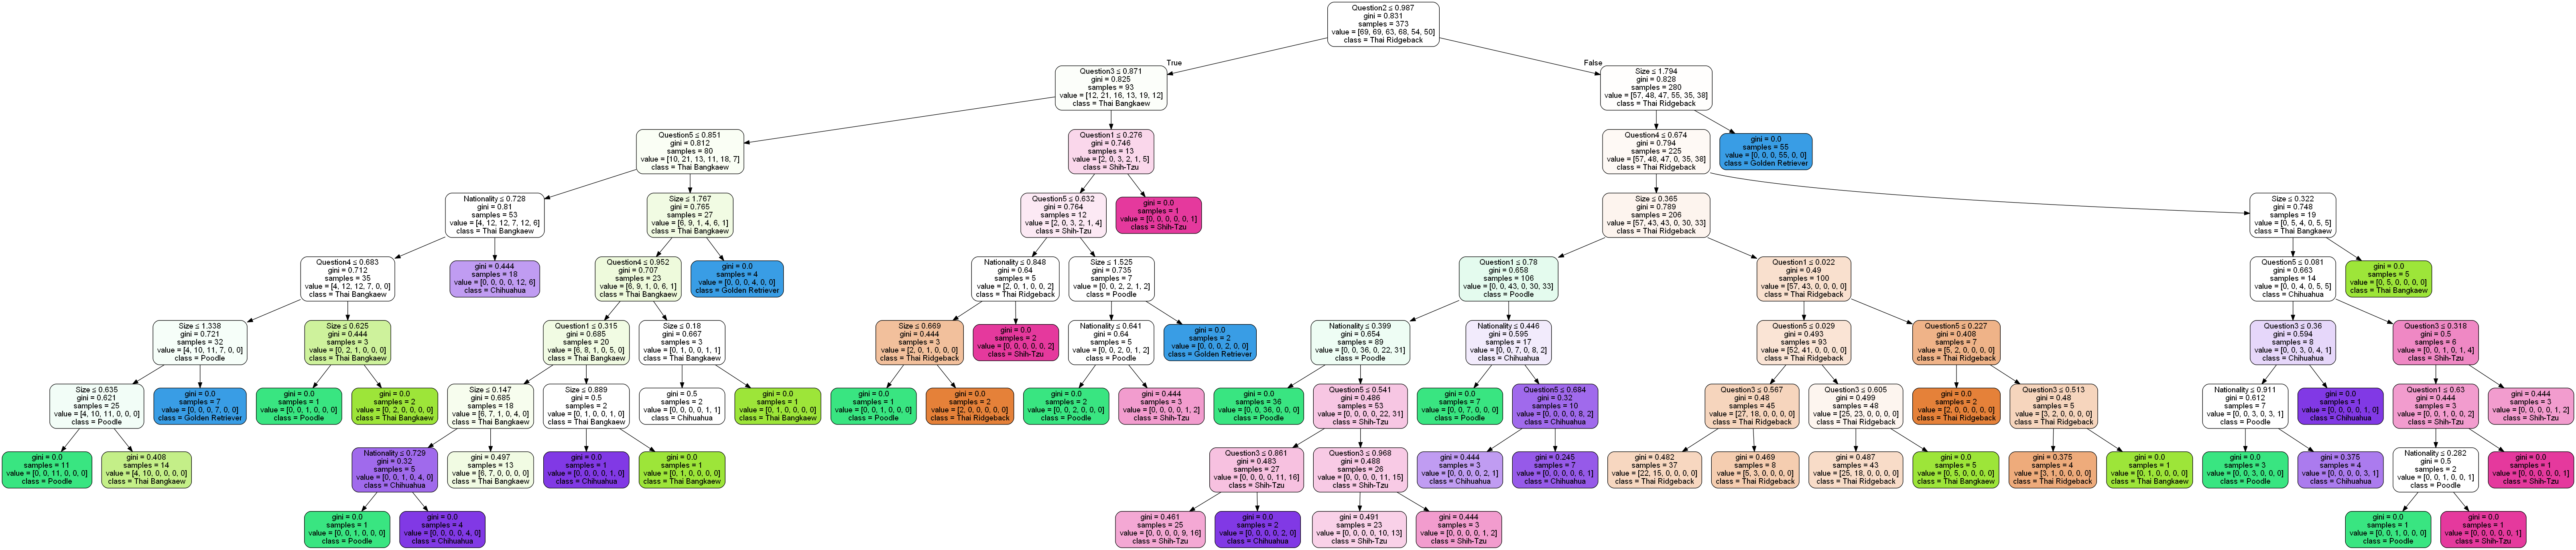

In [108]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
               feature_names=cols,
               class_names=['Thai Ridgeback', 'Thai Bangkaew', 'Poodle', 'Golden Retriever', 'Chihuahua', 'Shih-Tzu'],
               filled=True, rounded=True,
               special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Testing

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [110]:
model.score(x, y)

0.7882037533512064

## Cross validation

In [111]:
scores = cross_val_score(model, x, y, cv=10)
scores

array([0.68421053, 0.73684211, 0.68421053, 0.67567568, 0.75675676,
       0.64864865, 0.81081081, 0.72972973, 0.7027027 , 0.7027027 ])

In [112]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.71 (+/- 0.09)


In [113]:
predicted = cross_val_predict(model, x, y, cv=10)
predicted
pd.crosstab(y, predicted)

col_0,ชิวาวา,ชิสุ,พุดเดิ้ล,โกลเด้น รีทรีฟเวอร์,ไทยบางแก้ว,ไทยหลังอาน
Label,,,,,,
ชิวาวา,59,10,0,0,0,0
ชิสุ,43,25,0,1,0,0
พุดเดิ้ล,0,1,57,1,2,2
โกลเด้น รีทรีฟเวอร์,0,4,0,64,0,0
ไทยบางแก้ว,0,0,0,0,31,23
ไทยหลังอาน,0,0,0,0,22,28


## Classification Report

In [114]:
from sklearn.metrics import classification_report

print(classification_report(y, predicted))

                     precision    recall  f1-score   support

             ชิวาวา       0.58      0.86      0.69        69
               ชิสุ       0.62      0.36      0.46        69
           พุดเดิ้ล       1.00      0.90      0.95        63
โกลเด้น รีทรีฟเวอร์       0.97      0.94      0.96        68
         ไทยบางแก้ว       0.56      0.57      0.57        54
         ไทยหลังอาน       0.53      0.56      0.54        50

           accuracy                           0.71       373
          macro avg       0.71      0.70      0.69       373
       weighted avg       0.72      0.71      0.70       373



## Export model

In [51]:
import pickle

In [52]:
filename = 'dogclassification.pkl'
pickle.dump(model, open(filename, 'wb'))

## Load the model from disk

In [53]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x,y)
print(result)

0.7882037533512064
